In [124]:
#############################################################################################################################################
#
# Stock future performance classification based on text
# Evaluation of Model
###############################################################################################################################################

# import libraries
from __future__ import print_function
import numpy as np
from six.moves import zip
import json
import warnings
import pandas as pd
from pandas import DataFrame   
import pickle
import re
import sys 
import azureml
import string
from scipy import stats
import pip
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer     
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers.core import Dropout
from keras.layers import LSTM
from keras.layers import Dense, Input, Flatten 
from keras.layers import Conv1D, MaxPooling1D, Embedding 
from keras.models import Model 
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras.models import load_model
from keras.applications import imagenet_utils
from keras.layers import Embedding
from keras.utils.np_utils import to_categorical
from keras import initializers
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization
from keras.layers import initializers 
from keras.layers import regularizers 
from keras.layers import constraints 
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from keras.constraints import max_norm
import keras.backend as K
import os
import tempfile  
import logging
import gensim
from gensim.models import Phrases, phrases
from gensim.models.phrases import Phraser
from gensim.models import Word2Vec as wv
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models, similarities
from IPython.display import SVG
import cloudpickle
import csv
import mkl
import matplotlib.pyplot as plt
import h5py
from keras.models import load_model
import re
import io
from os.path import dirname, join
import regex
import graphviz
import pydotplus
import pyparsing
from keras.utils import plot_model




In [125]:

####################################################
# Set Global Vars
####################################################

MAX_SEQUENCE_LENGTH = 25000
MAX_NB_WORDS = 350000
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2
LEARNING_RATE = .0009
BATCH_SIZE = 75
DROPOUT_RATE = 0.50
np.random.seed(2032)

#change directory to write results
os.chdir('C:\\')
BASE_DIR = '.'
GLOVE_DIR = BASE_DIR + '/glove/'



In [126]:
##################################################
#load in train and test set
##################################################

os.chdir('C:\\glove\\nextagenda')

#double check
y_val = np.loadtxt("y_val.txt", delimiter=',', dtype = int)                   # use ';' as column separator instead of whitespace
X_val = np.loadtxt("X_val.txt", delimiter=',', dtype = int)  

print('shape of y_val',y_val.shape)
print('shape of X_val',X_val.shape)

print('yval data type',y_val.dtype)
print('xval data type',X_val.dtype)
 
from itertools import islice
head = list(islice(y_val, 2))
print(head)

from itertools import islice
head = list(islice(X_val, 1))
print(head)
#Reformat label content

#labels = to_categorical(np.asarray(labels))

shape of y_val (199, 3)
shape of X_val (199, 25000)
yval data type int32
xval data type int32
[array([0, 1, 0]), array([0, 1, 0])]
[array([   0,    0,    0, ...,   30, 1421, 2685])]


In [131]:
#######################
# Load Model
#######################

model = load_model('C:\\glove\Oct9_New3EvenClass_v1model.h5')       
history = model
print('model loaded')

model loaded


In [140]:
def predict_classes(self, x, verbose=1):
    if proba.shape[-1] > 1:
        return proba.argmax(axis=-1)
    else:
        return (proba > 0.5).astype('int32')
type(X_val)

prediction = model.predict(np.array(X_val))
#predict_class = predict_classes(prediction)

#https://stackoverflow.com/questions/37891954/keras-how-do-i-predict-after-i-trained-a-model
#model.predict() expects the first parameter to be a numpy array. You supply a list, which does not have the shape attribute a numpy array has.
#prediction = model.predict(np.array(test_seq))

In [139]:
prediction.shape
history = model
score, acc = model.evaluate(X_val, y_val, batch_size=50)


199/199 [==============================] - 81s     


In [141]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 1.14727344765
Test accuracy: 0.366834166062


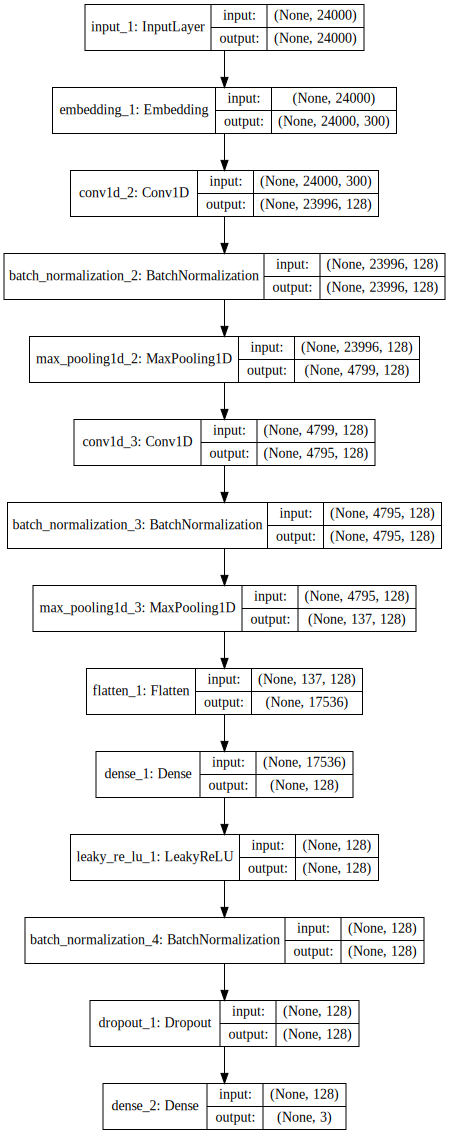

In [128]:
#######################################
# Plot the model architecture
#######################################
from IPython.display import Image, display, SVG
from keras import utils
from keras.utils import vis_utils
from keras.utils.vis_utils import model_to_dot

# Show the model in ipython notebook
figure = SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
display(figure)
plot_model(model, to_file='C:\\glove\\nextagenda\\Oct30final.png')

In [129]:
#######################################
# Plot the model summary
#######################################

from keras.models import load_model
# returns a compiled model
# identical to the previous one

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 24000)             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 24000, 300)        8229900   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 23996, 128)        192128    
_________________________________________________________________
batch_normalization_2 (Batch (None, 23996, 128)        512       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4799, 128)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4795, 128)         82048     
_________________________________________________________________
batch_normalization_3 (Batch (None, 4795, 128)         512       
__________

In [130]:
X_val.dtype

dtype('int32')

In [145]:
print('Prediction',prediction)
print('Labels',y_val)

Prediction [[ 0.31241253  0.37921652  0.30837095]
 [ 0.34412324  0.25278118  0.40309554]
 [ 0.23796837  0.39221263  0.36981902]
 [ 0.30890581  0.34998634  0.34110782]
 [ 0.55561584  0.15553689  0.2888473 ]
 [ 0.1696821   0.46834856  0.36196932]
 [ 0.35895038  0.21194509  0.42910454]
 [ 0.35218808  0.2259855   0.42182642]
 [ 0.44855157  0.22817798  0.32327047]
 [ 0.23405731  0.27346429  0.4924784 ]
 [ 0.3574363   0.1884966   0.45406711]
 [ 0.42349458  0.20257908  0.37392634]
 [ 0.40210173  0.19235246  0.40554583]
 [ 0.20807132  0.35941991  0.43250877]
 [ 0.42349458  0.20257908  0.37392634]
 [ 0.29671812  0.36828059  0.33500129]
 [ 0.42349458  0.20257908  0.37392634]
 [ 0.42349458  0.20257908  0.37392634]
 [ 0.42349458  0.20257908  0.37392634]
 [ 0.25000972  0.32325327  0.42673701]
 [ 0.42349458  0.20257908  0.37392634]
 [ 0.3310973   0.29552174  0.37338099]
 [ 0.40825689  0.2004208   0.39132231]
 [ 0.32280356  0.33181375  0.34538269]
 [ 0.47962093  0.22730106  0.29307801]
 [ 0.39841712 

In [146]:
from keras.utils import np_utils
print(X_val.shape)
print(y_val.shape)

(199, 25000)
(199, 3)


In [147]:
#create np array with assigned predicted classes
def predict_classes(self, x, verbose=1):
    proba = self.predict(x, verbose=verbose)
    if proba.shape[-1] > 1:
        return proba.argmax(axis=-1)
    else:
        return (proba > 0.5).astype('int32')

def probas_to_classes(prediction):
    if len(prediction.shape) > 1 and prediction.shape[1] > 1:
        return categorical_probas_to_classes(prediction)
    return np.array([1 if p > 0.5 else 0 for p in prediction])

def categorical_probas_to_classes(prediction):
    return np.argmax(prediction, axis=1)

def labels_to_classes(y_val):
    if len(y_val.shape) > 1 and y_val.shape[1] > 1:
        return categorical_labels_to_classes(y_val)
    return np.array([1 if p > 0.5 else 0 for p in y_val])

def categorical_labels_to_classes(y_val):
    return np.argmax(y_val, axis=1)

In [148]:
from tempfile import TemporaryFile
pred_classes=probas_to_classes(prediction)
print(pred_classes)
y_classes=labels_to_classes(y_val)
print(y_classes)

[1 2 1 1 0 1 2 2 0 2 2 0 2 2 0 1 0 0 0 2 0 2 0 2 0 0 0 2 1 1 0 2 2 0 0 0 0
 0 1 2 2 0 2 1 2 1 2 0 2 2 0 2 2 2 2 0 2 2 1 1 2 2 2 0 2 0 2 0 0 0 2 0 0 2
 2 1 1 2 0 1 2 2 0 0 1 0 2 2 0 2 0 2 1 0 0 2 2 0 0 1 0 0 0 0 2 0 1 1 0 0 0
 2 0 1 1 2 0 0 1 1 0 1 1 0 0 0 0 2 1 1 2 1 2 2 0 2 2 2 0 2 0 0 1 2 0 0 2 2
 1 0 2 2 0 2 0 2 0 0 2 2 1 2 0 2 1 2 2 0 0 0 0 1 2 0 1 2 0 1 0 0 2 2 0 0 0
 2 0 1 1 2 0 0 2 2 2 0 0 0 2]
[1 1 1 2 2 2 1 2 1 0 0 1 2 0 0 2 1 1 0 2 2 1 2 1 2 0 2 2 1 0 1 2 1 0 0 0 1
 0 1 0 0 1 0 1 2 1 1 1 1 0 0 2 0 1 1 1 0 2 1 2 0 0 2 1 1 0 0 2 1 0 2 2 1 0
 0 1 2 0 0 1 1 2 0 0 2 0 1 2 0 2 2 1 0 0 0 0 1 1 0 2 1 0 2 0 1 0 1 1 2 1 0
 1 0 0 0 1 1 2 0 1 0 1 0 0 0 1 2 1 1 1 0 0 2 1 1 1 0 1 0 1 1 2 0 0 0 0 2 0
 2 0 0 0 1 2 0 0 1 0 0 2 2 1 2 1 0 2 1 0 2 2 2 0 1 2 0 2 1 0 1 2 2 1 2 2 2
 1 0 0 0 2 2 0 1 2 1 0 2 1 1]


Confusion matrix, without normalization
[[36 14 24]
 [24 15 31]
 [24  9 22]]
Normalized confusion matrix
[[ 0.49  0.19  0.32]
 [ 0.34  0.21  0.44]
 [ 0.44  0.16  0.4 ]]


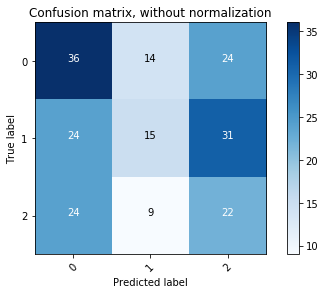

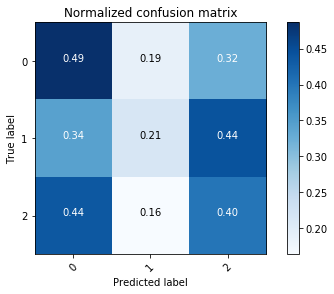

Confusion Matrix:

Predicted   0   1   2  __all__
Actual                        
0          36  14  24       74
1          24  15  31       70
2          24   9  22       55
__all__    84  38  77      199


Overall Statistics:

Accuracy: 0.366834170854
95% CI: (0.29980333946217985, 0.43789747352388486)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.951380051372
Kappa: 0.0534541336353
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                        0          1          2
Population                                   199        199        199
P: Condition positive                         74         70         55
N: Condition negative                        125        129        144
Test outcome positive                         84         38         77
Test outcome negative                        115        161        122
TP: True Positive                             36         15         22
TN: True Negative                             77        106     

In [149]:
from pandas_confusion import ConfusionMatrix
from six.moves import range
from six.moves import zip
import itertools
confusion_matrix = ConfusionMatrix(y_classes, pred_classes)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_classes, pred_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
from pandas_ml import ConfusionMatrix
ConfusionMatrix = ConfusionMatrix(y_classes, pred_classes)
import matplotlib.pyplot as plt
ConfusionMatrix.print_stats()
